In [2]:
from masks import ura, pad

import matplotlib.pyplot as plt

# Simulation demonstration

This is a simple demo for the package. First let's load a mask and pad it: 

In [3]:
mask_size = (61, 59)
mask, decoder = ura(*mask_size)
padded_mask = pad(mask)

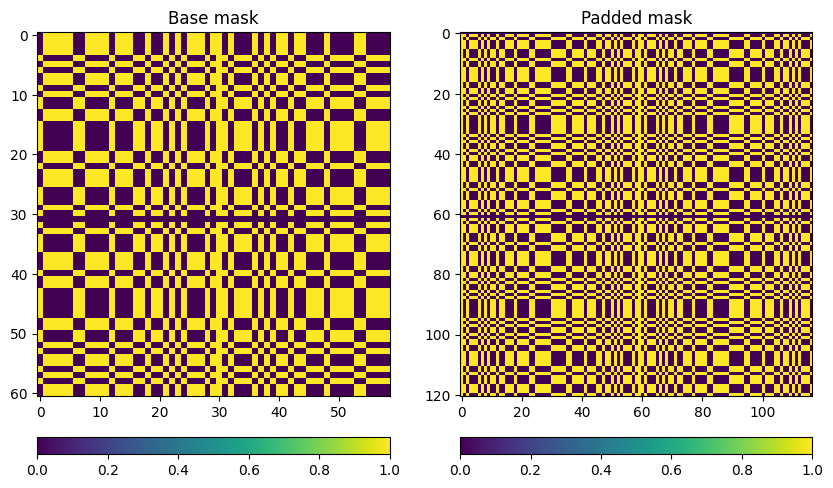

In [4]:
from masks.plot import plotmaps

fig, axs = plotmaps([(mask, "Base mask"), (padded_mask, "Padded mask")], figsize=(10, 7))
plt.show()

Now we simulate a photon list.

In [13]:
from masks import simulate

photon_list, info = simulate.photon_list(
    fsources = [2000, 1000],
    brate = 1,
    shape = mask_size
)
photon_list[:5]

array([[ 3, 27, 58, 24],
       [58, 24, 15,  3],
       [55, 53, 52,  9],
       [10, 23, 25, 29],
       [42, 56, 35,  2]])

The photon list is structured like this:
1. the first and second columns carry the photons x and y direction, in sky-grid units.
2. the third and fourth columns carry the hit mask element i and j indeces.

The photon list is not shuffled, and the source photons are at the end of it.

In [14]:
skymap_before_mask = simulate.skymap(photon_list, mask_size)
skymap_after_mask = simulate.skymap_transmitted(photon_list, mask)

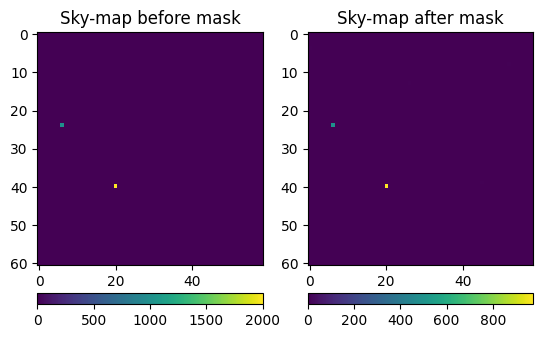

In [15]:
fig, axs = plotmaps(
    [(skymap_before_mask, "Sky-map before mask"),
     (skymap_after_mask, "Sky-map after mask")])
plt.show()

Now we form a detector image, transporting the photon list to the actual detector elements through the mask.

In [16]:
detector = simulate.transport(photon_list, mask)

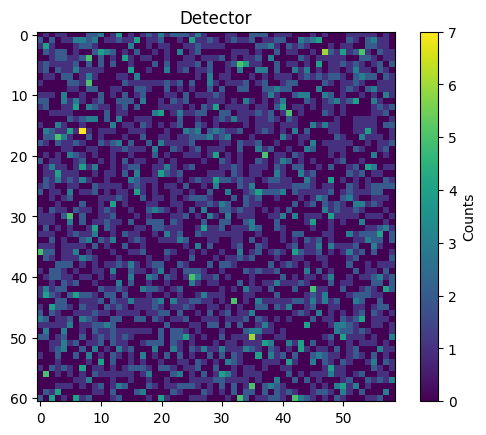

In [17]:
fig, ax = plt.subplots(1, 1)
c0 = ax.imshow(detector)
fig.colorbar(c0, ax=ax, label="Counts")
ax.set_title("Detector")
plt.show()

# Image reconstruction

Now let's consider a few reconstruction methods: cross-correlation, maximum-likelihood, minimum entropy.

In [18]:
from masks import reconstruct

skymap_cc = reconstruct.cross_correlation(detector, decoder)
skymap_mlemrec = reconstruct.mlem(detector, mask)
skymap_mem, _ = reconstruct.mem(detector, mask, decoder)

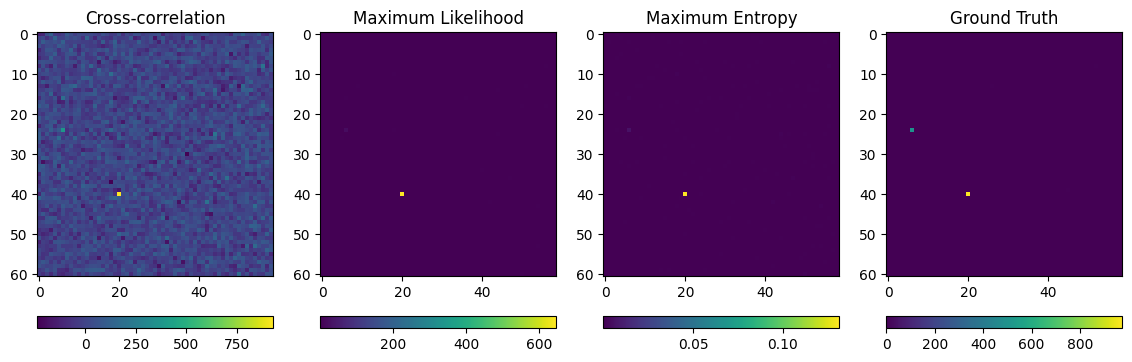

In [19]:
fig, axs = plotmaps(
    [
        (skymap_cc, "Cross-correlation"),
        (skymap_mlemrec, "Maximum Likelihood"),
        (skymap_mem, "Maximum Entropy"),
        (skymap_after_mask, "Ground Truth"),
    ],
    ncols=4,
    figsize = (14, 7),
)
plt.show()